In [ ]:
import os
import numpy as np
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from math import log
import matplotlib.pyplot as plt
import pandas as pd

path='/content/drive/MyDrive/CSCENLP/group/'
path2='/content/drive/MyDrive/CSCENLP/'


In [ ]:
corpusFile = open(os.path.abspath('train_text.txt'), 'r')
corpus = corpusFile.readlines()
len(corpus)

45615

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#remove @user and characters b4 that
tokenizer = RegexpTokenizer(r'\w+')
new_corpus = []
for sentence in corpus:
  anchor_word="@user"
  rmv_to_last = r'^.*{}'.format(re.escape(anchor_word))
  n_sentence=re.sub(rmv_to_last, '', sentence, flags=re.DOTALL).strip()
  new_corpus.append(tokenizer.tokenize(n_sentence))

In [ ]:
#remove stop words
for sentence in new_corpus:
  for word in sentence:
    if word in stop_words:
      sentence.remove(word)
len(new_corpus)

45615

In [ ]:
labelFile = open(os.path.abspath('train_labels.txt'), 'r')
labl = labelFile.readlines()
labels = []
for num in labl:
    labels.append(int(re.sub('\n', '', num)))
len(labels)
tr_set = [[corp, label] for corp, label in zip(new_corpus,labels)]

In [ ]:

for row in tr_set:
  if row[-1] ==1 :
    tr_set.remove(row)
for row in tr_set: 
  if row[-1]==2 or row[-1]>1:
    row[-1]=1 #negative sentiment now represented by 1
#remove empty tweets 
for row in tr_set:
  if not row[0]: # is False/empty:
    tr_set.remove(row)



In [ ]:
#remove 0 char tweet sentence
for sen in tr_set:

  if not sen[0]:
    tr_set.remove(sen)

In [ ]:
len(tr_set)#total is 30411 without empty tweets, at tine of last run

30411

In [ ]:
# checking for label of 2, to prevent future errors
for row in tr_set:
  if row[-1]==2:
     print(row[-1])

In [ ]:
#separate labels and input data
new_labels=[]
new_tr=[]
for row in tr_set:
  new_labels.append(row[-1])
  new_tr.append(row[0])

features 11,12 and 10 are created first. 
See below:

In [ ]:
#log longest word length
f11=[]
for row in new_tr:
  if len(row)>0:
    f11.append(log(len(max(row,key=len))))#natural log
  else:
    f11.append(0)


In [ ]:
#log count of words with 5 or more chars

f12=[]
for sentence in new_tr:
  ct=0
  for word in sentence:
   
    if len(word)>=5:
      ct+=1
  g=ct
  if g==0:
    f12.append(0)
  else:
    f12.append(log(g))



In [ ]:
#checking if any tweet has no characters/words. This depends on (and can be adjusted based on) the dataset in use, and prevents errors
for i in new_tr:
  if len(i) ==0:
    print(i)

In [ ]:

#log count of words
f10=[]
for i,sentence in enumerate(new_tr):
    c=len(sentence)
    f10.append(log(c))
print(f10)


[2.4849066497880004, 2.833213344056216, 2.6390573296152584, 2.6390573296152584, 3.091042453358316, 2.4849066497880004, 2.1972245773362196, 2.833213344056216, 2.4849066497880004, 1.9459101490553132, 2.4849066497880004, 3.044522437723423, 2.4849066497880004, 2.772588722239781, 2.772588722239781, 2.4849066497880004, 2.772588722239781, 2.772588722239781, 1.0986122886681098, 2.6390573296152584, 2.9444389791664403, 2.995732273553991, 2.833213344056216, 2.995732273553991, 2.6390573296152584, 2.772588722239781, 2.4849066497880004, 2.3978952727983707, 2.833213344056216, 2.772588722239781, 2.6390573296152584, 2.772588722239781, 2.5649493574615367, 2.9444389791664403, 2.3978952727983707, 1.791759469228055, 2.302585092994046, 2.4849066497880004, 2.1972245773362196, 2.8903717578961645, 2.8903717578961645, 2.833213344056216, 2.70805020110221, 2.772588722239781, 2.5649493574615367, 2.8903717578961645, 2.772588722239781, 2.8903717578961645, 2.302585092994046, 2.0794415416798357, 2.1972245773362196, 2.

In [ ]:
#read in words list for first 2 features, as dataframes
df_f1 = pd.read_csv(path2+'adj_2000.tsv', sep='\\t', engine='python',header=None)
df_f1.drop([2], axis=1,inplace=True)
df_f2 = pd.read_csv(path2+'f_words_2000.tsv', sep='\\t', engine='python',header=None)
df_f2.drop([2], axis=1, inplace=True)
df_f2.rename(columns={0: "words", 1: "score"}, inplace=True)
df_f1.rename(columns={0: "words", 1: "score"}, inplace=True)
df_f2.set_index(['words'],inplace=True)
df_f1.set_index(['words'],inplace=True)

In [ ]:
#f1 dictionaries created: this saves the words found in both the tsv files and the training dataset
#the first dictionary (d2 in this case) saves a score for a word found in the tsv and a particular sentence in the training data(by indexing) .
#the 2nd dictionary (d22 in this case) saves the word found in the tsv and a particular sentence, and the index of the sentence it was found in.

d2={}
d22={}
for word in df_f1.index:
  for  i,sen in enumerate(new_tr):
    c=0
    if word in sen:
      d2[i]=df_f1.loc[word].score #score for  a certain tweet
      d22[i]=word #word to delete from training data, already used
print(d2)


{5166: -0.23, 22487: -1.6, 5236: -3.15, 19636: -3.15, 22579: 0.01, 23550: -3.15, 30211: -3.15, 197: -3.1, 3671: -3.1, 4352: -3.1, 4955: -2.29, 7226: -3.1, 8183: -1.05, 8369: -3.1, 9110: -0.44, 10747: -3.1, 12863: -0.43, 13044: -0.34, 16552: -3.1, 19068: 0.32, 19398: -3.1, 19834: -1.55, 20346: 2.73, 21207: -1.93, 27657: -3.1, 28344: -3.1, 29920: 0.88, 902: 0.2, 2252: -2.89, 3687: -2.89, 3712: -1.55, 4543: 1.96, 4721: 1.54, 5229: -2.89, 7392: -2.89, 7872: -0.66, 9421: -2.89, 12030: 0.68, 12032: 1.53, 12394: 1.96, 12484: 2.33, 12751: -0.17, 14971: -2.89, 15376: -2.89, 15916: -0.69, 16354: -2.89, 16886: -2.89, 17339: -2.89, 18361: -2.89, 18609: 0.2, 19528: -2.89, 21620: 0.34, 23072: -2.61, 23653: -2.89, 25446: -2.89, 27843: -2.89, 292: 0.03, 3528: 0.35, 10294: 2.19, 15060: 0.31, 15299: -2.84, 26548: 0.44, 28102: -2.84, 20950: -2.83, 7346: -2.82, 8586: -2.82, 10988: -2.82, 12363: -2.82, 20636: -2.82, 28224: -2.82, 63: -0.87, 124: -1.28, 1313: -2.81, 2268: -2.81, 3004: -2.81, 3798: -2.81, 38

In [ ]:
#the dictionaries above are used to create f1 (feature1) values for the data set
#f1 is created with the scores obtained above, and the words used in the dictionary/scores are deleted from training data to prevent reuse
f1=[]
for i,sen in enumerate(new_tr):
  if i in d2:
    f1.append(d2[i])
    new_tr[i].remove(d22[i])
  else:
   f1.append(0) 
print(f1)

[0.33, 1.16, 0, 0, 0, -1.17, 0, 0, -0.17, 0, -0.3, 0.39, 0, -0.86, -0.39, 0, 0, -0.3, 0, 0, -0.14, 0.2, 0, -0.17, 0, 0, 0.41, 0, 0, 0.12, 0.26, 0, 0, 2.31, 0, 0, 0, 0, 0, 0.59, 0, 0, 0, 0, 0, 0, 0.85, 0, 0, 0.85, 0, 0.73, 1.0, -0.15, 2.26, 1.53, 0, 0, 1.24, 0, 0, 0, 0.95, -0.87, 0, 0, 0, 1.24, 0, -0.18, 1.66, 0, 0, 1.96, 0, 0, 1.8, 1.96, 0.85, -0.16, 2.53, 0, 1.86, 0, 0, 0, 0, -0.39, -1.55, 0, 0, 0, 0, 0, 0, 0, -0.17, 0, 0, 0, 1.07, 0, 0, -0.29, 0, 0, 0, 0, 0, 0.55, 0.75, 0.81, 0, 1.7, 0, 0, 0, 0, 0, 0.41, 0.88, 0, -0.18, 0, -1.28, 0.12, 0.35, -0.34, 0, 0, 0, 0.26, 1.16, 0, 0.33, 0, 0, -2.07, 0, -0.3, 0, 0, 0, 1.68, 0, 0, -0.27, 0.63, 0, 0, 0.01, 0, 0, 1.76, 0, 0, 1.32, 0, 0.25, 0, 0, 0.41, 0, 0, 1.16, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.41, 0, 0, 0, 0, 0, 1.53, 0, -0.33, 0, 0, -0.17, 0, 0, 1.24, -3.1, 0, -1.31, 0, 0.31, 0, 0, 0, 0, 0.08, -0.6, 0.35, 0, 0.39, 0, 0.01, -0.77, -0.17, 0, 0, 0, 0.33, -0.3, 0, 0, 1.82, 0, 0, 1.79, -0.14, 0, -0.29, 0.39, 0, 0, 0, 0, 0, 0,

In [ ]:
#f2 dictionaries created: same as described above for f1
di={}
dii={}
for word in df_f2.index:#.loc['words']:
  for  i,sen in enumerate(new_tr):
    c=0
    if word in sen:
      di[i]=df_f2.loc[word].score #score for  a certain tweet
      dii[i]=word #word to delete from training data, already used
print(di)

{4955: 0.28, 8183: 0.36, 9110: 1.42, 12863: 0.77, 13044: 0.33, 19068: 0.6, 19834: 1.53, 20346: 1.23, 21207: 1.5, 29920: 1.89, 2564: 0.52, 7639: 1.73, 29154: 0.11, 8155: 0.46, 22684: 0.26, 516: 0.95, 1033: 0.69, 1044: -0.04, 2784: 0.7, 6426: 0.7, 10851: 0.94, 11247: 0.49, 12357: 0.71, 13095: 0.64, 13808: 0.89, 19533: 0.76, 21740: 0.4, 22579: 0.37, 25752: 0.3, 27279: 0.04, 27457: 1.94, 27926: 0.3, 29963: -0.14, 6355: 0.35, 9869: 1.2, 12026: 0.5, 14525: 0.69, 20171: 0.52, 20778: 0.16, 22324: 0.49, 28163: 0.96, 2824: 1.35, 7088: -0.02, 15014: 0.57, 16567: -0.01, 18692: 0.22, 19138: 1.48, 19312: 0.7, 20233: 1.89, 20305: 0.69, 21263: 0.24, 22477: 0.76, 902: 0.68, 3712: 0.42, 4543: 0.49, 4721: 0.19, 7872: 0.69, 12030: 0.69, 12032: 0.1, 12394: 0.57, 12484: 0.95, 12751: 0.42, 15916: 2.44, 16886: 1.05, 18609: 1.26, 21620: 1.89, 23072: 0.35, 9514: 2.51, 19517: 1.05, 24689: 0.92, 2138: 0.52, 2253: 0.8, 2716: 0.33, 2946: 0.89, 3149: 0.24, 3796: 0.8, 3823: 0.35, 5326: 1.41, 7646: 0.8, 8933: 0.13, 92

In [ ]:
#f2 is created with the scores just like in f1
f2=[]
for i,sen in enumerate(new_tr):
  if i in di:
    f2.append(di[i])
    new_tr[i].remove(dii[i])
  else:
   f2.append(0) 
print(f2)


[0.29, 1.05, 0.21, 0.33, 0.32, 0.43, 0.58, 0.38, 0.44, 0.42, 0.62, 1.05, 0.42, 0.57, 0.57, 0.11, 0.42, 1.11, -0.11, 0.4, 0.78, 1.05, 1.12, 1.5, 0.63, 1.89, 0.52, 2.36, 0.4, 0.23, 0.88, 0.9, 0.35, 1.26, 0.3, 0.39, 0.4, 0.63, 1.59, 0.71, 0.83, 0.93, 0.63, 0.54, 0.38, 0.93, 1.06, 1.25, 0.35, -0.14, 0.37, 1.59, 0.35, 0.99, 2.45, 0.69, 2.09, 0.49, 0.42, -0.35, 0.41, 1.25, 0.75, 0.15, 0.15, -0.04, 0, 0.42, 0.68, 1.52, 0.48, 0, 0.57, 0.3, 0, 1.35, 0.57, 0.39, 0.52, 0.71, 1.89, 0.27, 0.8, 0.89, 1.22, 0.18, 0.41, 0.48, 1.5, 0.45, 0.52, -1.33, 0.81, 0.42, 0.63, 0.61, 0.57, 0.63, 0.49, 0.63, 0.42, 0.57, 0.18, -0.04, 1.05, 0.49, -1.18, 0.61, 0.71, -0.02, 0.42, 0.49, 0, 0.42, 1.05, 0.09, 0.45, 0.77, 0.41, 0.62, 0.31, 0.42, 0.93, 0.4, 0.57, 0.89, 0.42, 1.94, 0.13, 1.44, 1.41, 2.09, 0.42, 1.05, 0.4, 0.95, 0.41, 0.39, 0.42, 0.1, 0.45, 0.78, 0.69, 0, 0.68, 0.35, 2.09, 1.04, 0.9, 0.95, 0.37, 0.3, 0.44, 2.09, -0.11, 0.44, 0.38, 0.21, 2.49, 1.59, 0.42, 1.5, 0.97, 0.42, 1.5, 1.89, 0.58, 0.31, 0.93, 1.05, 0

new_tr has a new current state/values:
Saved separately for easy tracking

In [ ]:
newt1=new_tr[:]
len(newt1)

30411

In [ ]:
#finds the name of all relevant tsvs to allow easier reading and dataframe creation for features 3-9
#creates a list of file names
bim=[]
for tsv in os.listdir(path):
  bim.append(tsv)

In [ ]:
def clean_df(string):
  '''cleans dataframe by removing last column and changing column names to words and scores
  Input is the path to the tsv file
  returns:
  Edited dataframe'''
  dataframe=pd.read_csv(string, sep='\\t', engine='python',header=None)
  dataframe.drop([2], axis=1, inplace=True)
  dataframe.rename(columns={0: "words", 1: "score"}, inplace=True)
  return dataframe

In [ ]:
def grp_dfs(num1,num2):
  ''' gets the tsv in list of file names, from position (zero-index) num1-1 to num2-1,
  converts each of these to dataframes and combines them into a single dataframe 
  input:
    num1,num2
  returns:
    dataframe
  '''
  dfv = pd.DataFrame()
  for i,file in enumerate(bim):
    if i>num2:
      dfc=pd.DataFrame()
      pass
    elif i==num1-1:
      dfc=clean_df(path+bim[i]) 
    elif i==num1:
      dfc=clean_df(path+bim[i])
    elif i>num1 and i<num2:
      dfc=clean_df(path+bim[i])
    else:
      dfc=pd.DataFrame()
      pass
    dfv=dfv.append(dfc, ignore_index=True)
  return(dfv)

In [ ]:
#creates 7 groups/dataframes from 44 tsv files made available
#the index is set to the word column for easy value retrieval
grp1=grp_dfs(1,7)
grp2=grp_dfs(7,13)
grp3=grp_dfs(13,19)
grp4=grp_dfs(19,25)
grp5=grp_dfs(25,31)
grp6=grp_dfs(31,38)
grp7=grp_dfs(38,45)
grp1.set_index(['words'],inplace=True)
grp2.set_index(['words'],inplace=True)
grp3.set_index(['words'],inplace=True)
grp4.set_index(['words'],inplace=True)
grp5.set_index(['words'],inplace=True)
grp6.set_index(['words'],inplace=True)
grp7.set_index(['words'],inplace=True)


In [ ]:
#the average value of each word's score, per group, is used to account for words occuring more than once
grp1=grp1.groupby('words').mean()
grp2=grp2.groupby('words').mean()
grp3=grp3.groupby('words').mean()
grp4=grp4.groupby('words').mean()
grp5=grp5.groupby('words').mean()
grp6=grp6.groupby('words').mean()
grp7=grp7.groupby('words').mean()

In [ ]:
def get_dict2(dataframe,train):
  '''gets the dictionaries with scores and related words found in both the tsv files and the training dataset, each with corresponding train_data sentence index
the first dictionary (dg1 in this case) saves a score for a word found in the tsv and a particular sentence in the training data(by indexing) .
the 2nd dictionary (dg11 in this case) saves the word found in the tsv and a particular sentence, and the index of the sentence it was found in.
  Returns:
   2 dictionaries dg1 and dg11, ''' 
  #put in current train data 
  dg1={}
  dg11={}
  for  i,sen in enumerate(train):
    if len(sen)==0:
      dg1[i]=0
    else:
      for word in sen:
        if word in dataframe.index:
          dg1[i]=dataframe.loc[word].score #score for  a certain tweet based on word used
          dg11[i]=word #word to delete from training data, already used
        else:
          dg1[i]=0
      
  return(dg1,dg11)

In [ ]:
#f3 to f9 continued

def get_f(di,dii,train):
  '''
  The dictionaries created above (d1,d11) are used to create f3-f9 (feature 3 to feature 9) values for the data set
f3-f9 are created with the scores obtained and recoreded in dictionaries above, and the words used in the dictionary/scores are deleted from training data to prevent reuse
input:
current x dataset: train, dictionaries di and dii
Returns:
  f3:feature value list named arbitrarily
  train: the new updated x data set

  '''
  f3=[]
  for i,sen in enumerate(train):
    #print(i)
    f3.append(di[i])
    if di[i]> 0 or di[i]<0:
        #print('ffff',di[i],dii[i])
        train[i].remove(dii[i])
  return(f3,train)

In [ ]:
dgp1,dgp11=get_dict2(grp1,newt1)


In [ ]:
# newt11=new_tr1[:]
# newt12=new_tr1[:]
# newt13=new_tr1[:]
# newt14=new_tr1[:]


In [ ]:
f3,newt1_=get_f(dgp1,dgp11,newt1)
newt_2=newt1_[:] #each run uses a copy of the new x data for easy tracking to avoid list.remove(x): x not in list errors

In [ ]:
dgp2,dgp22=get_dict2(grp2,newt_2)
f4,newt2_=get_f(dgp2,dgp22,newt_2)
newt_3=newt2_[:]

In [ ]:
dgp3,dgp33=get_dict2(grp3,newt_3)
f5,newt3_=get_f(dgp3,dgp33,newt_3)
newt_4=newt3_[:]

In [ ]:
dgp4,dgp44=get_dict2(grp4,newt_4)
f6,newt4_=get_f(dgp4,dgp44,newt_4)
newt_5=newt4_[:]

In [ ]:
dgp5,dgp55=get_dict2(grp5,newt_5)
f7,newt5_=get_f(dgp5,dgp55,newt_5)
newt_6=newt5_[:]

In [ ]:
dgp6,dgp66=get_dict2(grp6,newt_6)
f8,newt6_=get_f(dgp6,dgp66,newt_6)
newt_7=newt6_[:]

In [ ]:
dgp7,dgp77=get_dict2(grp7,newt_7)
f9,newt7_=get_f(dgp7,dgp77,newt_7)

In [ ]:
#features converted to numpy arrays for easy calculations
f1n = np.array(f1)
f2n = np.array(f2)
f3n = np.array(f3)
f4n = np.array(f4)
f5n = np.array(f5)
f6n = np.array(f6)
f7n = np.array(f7)
f8n = np.array(f8)
f9n = np.array(f9)
f10n = np.array(f10)
f11n = np.array(f11)
f12n = np.array(f12)
np.transpose(f1n)
np.transpose(f2n)
np.transpose(f3n)
np.transpose(f4n)
np.transpose(f5n)
np.transpose(f6n)
np.transpose(f7n)
np.transpose(f8n)
np.transpose(f9n)
np.transpose(f10n)
np.transpose(f11n)
np.transpose(f12n)

array([2.07944154, 2.07944154, 2.19722458, ..., 2.19722458, 2.30258509,
       2.30258509])

In [ ]:
Xtrain=np.vstack((f1n,f2n,f3n,f4n,f5n,f6n,f7n,f8n,f9n,f10n,f11n,f12n)) #X arrays joined to form 2D array for calculation purposes
Xtrain.shape

(12, 30411)

In [ ]:
#Y arrays reshaped for calculation purposes
Ytrain=np.array(new_labels)
#np.transpose(Ytrain)
Ytrain=np.reshape(Ytrain,(1,Xtrain.shape[1]))
Ytrain.shape

(1, 30411)

In [ ]:
def sigmoid(num):
    return 1/(1 + np.exp(-num))

In [ ]:
def log_reg(X_val, Y_val, l_rate, iters):
  '''log_reg trains a logistic regression model with X_val (Xtrain),Y_val (Ytrain) and
updates weights W with a learning rate of l_rate. Batch gradient descent is used.
Inputs:
  X_val: xtrain values/array 
  Y_val: ytrain values/array 
  l_rate: learning rate
  iters: number of iterations
Returns:
W= computed log. regression  weights
B= computed log. regression  constants
error_list= list of costs to plot a graph later 

 '''
  
  m = Xtrain.shape[1]
  n = Xtrain.shape[0]
  
  W = np.zeros((n,1))
  B = 0
  error_list = []
  
  for i in range(iters):
      
      Z = np.dot(W.T, X_val) + B
      S = sigmoid(Z)
      
      # error/cost function (average of all losses)
      error = -(1/m)*np.sum( Y_val*np.log(S) + (1-Y_val)*np.log(1-S))
      
      # Gradient Descent
      dW = (1/m)*np.dot(S-Y_val, X_val.T)
      W = W - l_rate*dW.T
      dB = (1/m)*np.sum(S - Y_val)
      B = B - l_rate*dB
      
      #tracking cost function values
      error_list.append(error)
      
      if(i%(iters/10) == 0):
          print("cost after ", i, "iterations is : ", error)

  return W, B, error_list

In [ ]:
weights, constant, costs = log_reg(Xtrain, Ytrain, l_rate = 0.45, iters = 50000) #4mins 11 secs, iters 50000,0.45=lrate

cost after  0 iterations is :  0.6931471805599452
cost after  5000 iterations is :  0.5071304208204808
cost after  10000 iterations is :  0.5070985003184522
cost after  15000 iterations is :  0.5070981547830022
cost after  20000 iterations is :  0.5070981509890625
cost after  25000 iterations is :  0.507098150947344
cost after  30000 iterations is :  0.5070981509468852
cost after  35000 iterations is :  0.5070981509468802
cost after  40000 iterations is :  0.50709815094688
cost after  45000 iterations is :  0.50709815094688


In [ ]:
#log_reg(Xtrain, Ytrain, l_rate = 0.45, iters = 5000)

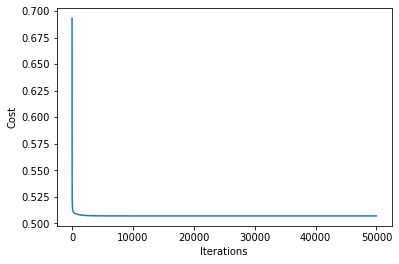

In [ ]:
plt.plot(np.arange(50000), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

#  TEST OPERATIONS BEGIN *HERE*

Since functions were not created for feature preparation, the feature creation codes used on the training set were modified for used on the test data/tweets and labels.

Variable names are edited for test data by simply adding 't' to the end or 'e' if the last letter is already 't'.
This goes on for the next 16 cells.

In [ ]:
corpusFilet = open(os.path.abspath('test_text.txt'), 'r')
corpust = corpusFilet.readlines()
len(corpust)

12284

In [ ]:
#remove @user and characters b4 that
tokenizer = RegexpTokenizer(r'\w+')
new_corpust = []
for sentence in corpust:
  anchor_word="@user"
  rmv_to_last = r'^.*{}'.format(re.escape(anchor_word))
  n_sentence=re.sub(rmv_to_last, '', sentence, flags=re.DOTALL).strip()
  new_corpust.append(tokenizer.tokenize(n_sentence))

In [ ]:
#remove stop words
for sentence in new_corpust:
  for word in sentence:
    if word in stop_words:
      sentence.remove(word)
len(new_corpust)

12284

In [ ]:
labelFilet = open(os.path.abspath('train_labels.txt'), 'r')
lablt = labelFilet.readlines()
labelst = []
for num in lablt:
    labelst.append(int(re.sub('\n', '', num)))
len(labels)
te_set = [[corp, label] for corp, label in zip(new_corpust,labelst)]

In [ ]:
for row in te_set:
  if row[-1] ==1 :
    te_set.remove(row)
for row in te_set: 
  if row[-1]==2 or row[-1]>1:
    row[-1]=1 #negative sentiment now repped by 1
#remove empty tweets and neutral tweets
for row in te_set:
  if not row[0]:# is False:
    te_set.remove(row)
#remove 0 char tweet sentence
for sen in te_set:
  if not sen[0]:
    te_set.remove(sen)
len(te_set)

7965

In [ ]:
# checking for label of 2
for row in te_set:
  if row[-1]==2:
     print(row[-1])
#separate labels and data
new_labelst=[]
new_te=[]
for row in te_set:
  new_labelst.append(row[-1])
  new_te.append(row[0])

In [ ]:
#log longest word length
f11t=[]
for row in new_te:
  if len(row)>0:
    f11t.append(log(len(max(row,key=len))))#natural log
  else:
    f11t.append(0)
#log count of words with 5 or more chars

f12t=[]
for sentence in new_te:
  ct=0
  for word in sentence:
   
    if len(word)>=5:
      ct+=1
  g=ct
  if g==0:
    f12t.append(0)
  else:
    f12t.append(log(g))


new_te has empty rows after this

In [ ]:
for i in new_te:
  if len(i) ==0:
    print(i)
#log count of words


[]
[]
[]


f10t list creation accounts for this by adding an extra condition.

In [ ]:
f10t=[]
for i,sentence in enumerate(new_te):
    c=len(sentence)
    if len(sentence)==0:
      f10t.append(0)
    else:
      f10t.append(log(c))
#print(f10t)


In [ ]:
#f1 dicts created
d2t={}
d22t={}
for word in df_f1.index:
  for  i,sen in enumerate(new_te):
    c=0
    if word in sen:
      d2t[i]=df_f1.loc[word].score #score for  a certain tweet based on a word in it
      d22t[i]=word #word to delete from training data/tweet, already used
print(d2t)
#f1 continued, completed
f1t=[]
for i,sen in enumerate(new_te):
  if i in d2t:
    f1t.append(d2t[i])
    new_te[i].remove(d22t[i])
  else:
   f1t.append(0) 
print(f1t)

{1293: -3.18, 2430: -1.12, 5201: -0.43, 5486: -3.18, 1142: -3.1, 2248: 1.05, 2873: -0.36, 5601: -1.42, 6213: -3.1, 6364: 0.99, 1310: -0.33, 3396: 0.55, 4481: -2.89, 4576: 1.54, 5459: -2.89, 6013: -2.89, 7767: -1.59, 518: 0.03, 2676: 0.01, 30: -2.81, 944: -0.69, 2914: -2.81, 3039: -2.07, 3401: -2.81, 3487: -2.81, 5550: -0.79, 6077: -2.81, 6281: -0.93, 6554: -0.45, 7850: -2.81, 6226: 0.03, 1859: 0.76, 2943: -2.61, 3940: 0.35, 4889: -2.61, 5504: 1.64, 6494: 0.51, 7385: -0.65, 2459: -2.59, 2787: -2.59, 3697: -2.59, 6606: -0.86, 7502: -2.59, 6166: -2.57, 7725: -2.57, 4134: -2.55, 5347: -0.0, 6909: -2.53, 6306: -2.47, 7866: -2.47, 663: -2.43, 702: -2.43, 969: -2.43, 988: -2.43, 1030: 0.25, 2144: -1.16, 2890: -0.5, 2990: -2.43, 3857: 1.35, 4523: -2.43, 4825: 0.68, 5849: 0.18, 7546: -2.43, 7893: 1.6, 4822: -0.43, 5167: 0.22, 6626: -2.4, 6781: -2.4, 1385: -2.29, 2266: -2.29, 2323: 0.08, 3957: -2.29, 5065: -0.15, 6296: -2.29, 6444: -2.29, 7409: -2.29, 7417: -2.29, 2897: -0.19, 5186: -2.18, 98: -

In [ ]:
#f2 dicts created
dit={}
diit={}
for word in df_f2.index:#.loc['words']:
  for  i,sen in enumerate(new_te):
    c=0
    if word in sen:
      dit[i]=df_f2.loc[word].score #score for  a certain tweet
      diit[i]=word #word to delete from training data, already used
print(dit)
#f2 continued, completed
f2t=[]
for i,sen in enumerate(new_te):
  if i in dit:
    f2t.append(dit[i])
    new_te[i].remove(diit[i])
  else:
   f2t.append(0) 
print(f2t)

{2248: 0.93, 2873: 1.37, 5601: 0.01, 6364: -0.73, 6226: -0.15, 2117: 0.21, 1859: 0.61, 3940: 1.5, 5504: 0.6, 6494: 0.69, 7385: 1.16, 7085: 0.57, 2247: 0.57, 1310: 0.8, 3396: 0.17, 4576: 0.52, 7767: -0.08, 4822: 0.57, 5167: 0.2, 1030: 0.2, 2144: 0.11, 2890: 0.24, 3857: 0.31, 4825: 0.27, 5849: 0.9, 7893: 0.48, 5465: -3.02, 4669: -0.09, 4678: 0.64, 6292: 1.89, 818: 0.6, 3297: 0.8, 6308: 0.25, 7618: 2.16, 4153: 1.14, 4583: 0.6, 6125: 0.57, 2281: 0.24, 3913: 0.72, 7279: 0.57, 884: 0.16, 1544: 0.4, 3115: 0.16, 4303: 0.06, 4396: 0.48, 4812: 0.48, 7264: 0.46, 896: 0.36, 6036: -0.0, 7114: 0.4, 247: 2.51, 3240: 0.3, 6425: -0.05, 1348: -2.79, 5847: 0.45, 3176: 0.36, 5076: 0.69, 4273: 0.38, 232: 0.69, 4418: 0.54, 5184: 1.04, 7930: 1.89, 481: 0.37, 1128: -0.35, 1812: 0.0, 2473: 0.57, 2930: -2.67, 3812: 0.57, 3815: 0.52, 4578: 0.26, 4852: 0.39, 6103: 2.09, 6944: 0.28, 7014: 0.04, 7240: 0.57, 7416: 0.54, 7774: 0.57, 2902: 0.66, 5626: 0.25, 3399: 0.39, 1907: 0.07, 2705: -0.19, 3772: 0.57, 7762: 0.57, 

In [ ]:
newt1t=new_te[:]
len(newt1t)

7965

In [ ]:
dgp1t,dgp11t=get_dict2(grp1,newt1t)
f3t,newt1_t=get_f(dgp1t,dgp11t,newt1t)
newt_2t=newt1_t[:]

dgp2t,dgp22t=get_dict2(grp2,newt_2t)
f4t,newt2_t=get_f(dgp2t,dgp22t,newt_2t)
newt_3t=newt2_t[:]

dgp3t,dgp33t=get_dict2(grp3,newt_3t)
f5t,newt3_t=get_f(dgp3t,dgp33t,newt_3t)
newt_4t=newt3_t[:]

dgp4t,dgp44t=get_dict2(grp4,newt_4t)
f6t,newt4_t=get_f(dgp4t,dgp44t,newt_4t)
newt_5t=newt4_t[:]

dgp5t,dgp55t=get_dict2(grp5,newt_5t)
f7t,newt5_t=get_f(dgp5t,dgp55t,newt_5t)
newt_6t=newt5_t[:]

dgp6t,dgp66t=get_dict2(grp6,newt_6t)
f8t,newt6_t=get_f(dgp6t,dgp66t,newt_6t)
newt_7t=newt6_t[:]

dgp7t,dgp77t=get_dict2(grp7,newt_7t)
f9t,newt7_t=get_f(dgp7t,dgp77t,newt_7t)

In [ ]:

f_listt=[f1t,f2t,f3t,f4t,f5t,f6t,f7t,f8t,f9t,f10t,f11t,f12t]
for f in f_listt:
  print(len(f))

f1nt = np.array(f1t)
f2nt = np.array(f2t)
f3nt = np.array(f3t)
f4nt = np.array(f4t)
f5nt = np.array(f5t)
f6nt = np.array(f6t)
f7nt = np.array(f7t)
f8nt = np.array(f8t)
f9nt = np.array(f9t)
f10nt = np.array(f10t)
f11nt = np.array(f11t)
f12nt = np.array(f12t)
np.transpose(f1nt)
np.transpose(f2nt)
np.transpose(f3nt)
np.transpose(f4nt)
np.transpose(f5nt)
np.transpose(f6nt)
np.transpose(f7nt)
np.transpose(f8nt)
np.transpose(f9nt)
np.transpose(f10nt)
np.transpose(f11nt)
np.transpose(f12nt)
Xtest=np.vstack((f1nt,f2nt,f3nt,f4nt,f5nt,f6nt,f7nt,f8nt,f9nt,f10nt,f11nt,f12nt))

7965
7965
7965
7965
7965
7965
7965
7965
7965
7965
7965
7965


In [ ]:
Ytest=np.array(new_labelst)
np.transpose(Ytest)
Ytest=np.reshape(Ytest,(1,Xtest.shape[1]))
Ytest.shape

(1, 7965)

# EVALUATION SECTION

THE MODEL CREATED IS EVALUATED USING A FUNCTION eval BELOW. 

In [ ]:
def eval(X_val, Y_val, W, B):
  '''
  evaluates false positive, false negative, true positive, true negative values 
  based on input Xtest and Ytest data arrays, and the weights and biases from 
  fitting the training data.

  Inputs:
    X_val:the test x data array
    Y_val:the test y data array
    Weight: weight values obtained from fitting model on training data 
    Bias/constant: bias values obtained from fitting model on training data 
  Returns:
    FP: false positive
    FN: false negative
    TP: true positive
    TN: true negative
    Y_pred: predicted y values
  '''
    
  Z = np.dot(W.T, X_val) + B
  S = sigmoid(Z)
  S = S > 0.5 
  S = np.array(S, dtype = 'int64')
  Y_prd=np.array(S, dtype = 'int64')
  S=S*3
  difference=S - Y_val
  FP = (difference == 3).sum()
  FN = (difference == -1).sum()
  TP = (difference == 2).sum()
  TN = (difference == 0).sum()


  return(FP,FN,TP,TN,Y_prd)

In [ ]:
FP,FN,TP,TN,y_pred=eval(Xtest, Ytest, weights, constant) 

In [ ]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of model =',round(Accuracy*100,2),'%')

Accuracy of model = 76.18 %


In [ ]:
print(TP,FP,FN,TN)

6035 1759 138 33


In [ ]:
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)

print(f"Precision={round(Precision*100, 2)}% and Recall ={round(Recall*100,2)}%")

Precision=77.43% and Recall =97.76%



 ![ alt text for screen readers](https://images.deepai.org/user-content/9954225913-thumb-4901.svg "F1-score formula")
 

  ![ alt text for screen readers](https://miro.medium.com/max/888/1*7J08ekAwupLBegeUI8muHA.png "Precision and recall formulas")

In [ ]:
F1_score=TP/(TP+(0.5*(FP+FN)))
print("F1_score of the model is : ", round(F1_score*100, 2), "%")

F1_score of the model is :  86.47 %
